In [4]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
C:\Users\Dimasyan\Anaconda3\lib\site-packages\s

# ДТП на основных въездных магистралях г.Москва

In [23]:
shp_path = 'DTP_ENTRANCE.shp'
sf = shp.Reader(shp_path, encoding = 'cp1251')

In [24]:
len(sf.shapes())

3381

In [25]:
sf.records()

[Record #0: ['292293', '2015-09-23', '23:30:00', 'Южное Тушино', 'г Москва', '2', '1', '1', '2', '0', '2', '1', '0', '0', '5', 'Нарушение правил перестроения', 'АЗС::Крупный торговый объект (являющийся объектом массового тяготения пешеходов и (или) транспорта)::Мост', 292217, 55.832222, 37.395, '', '', 25, '', 0.0],
 Record #1: ['292305', '2017-05-02', '20:30:00', 'Южное Тушино', 'г Москва', '2', '1', '1', '2', '1', '1', '1', '0', '0', '5', 'Нарушение правил перестроения', 'Отсутствие в непосредственной близости объектов УДС и объектов притяжения', 292229, 55.8323, 37.3952, '', '', 33, '', 0.0],
 Record #2: ['292373', '2016-07-18', '01:45:00', 'Южное Тушино', 'г Москва', '2', '1', '1', '2', '0', '2', '1', '0', '0', '5', 'Неправильный выбор дистанции', 'Отсутствие в непосредственной близости объектов УДС и объектов притяжения', 292297, 55.8323, 37.3952, '', '', 79, '', 0.0],
 Record #3: ['292390', '2017-01-11', '13:45:00', 'Южное Тушино', 'г Москва', '2', '1', '2', '2', '0', '1', '1', '

In [20]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]    
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)    
    return df

In [111]:
df = read_shapefile(sf)
df.shape

(3381, 26)

In [112]:
df = df[['pdd_narush'
]].copy()

In [120]:
print('------- N A R U S H E N I E ----------------------')
print(df.pdd_narush.value_counts())

------- N A R U S H E N I E ----------------------
Неправильный выбор дистанции                                                                                                     1072
Нарушение правил перестроения                                                                                                     499
Нарушение требований сигналов светофора                                                                                           367
Несоответствие скорости конкретным условиям движения                                                                              292
Нарушение правил расположения ТС на проезжей части                                                                                186
                                                                                                                                 ... 
Нарушение правил расположения ТС на проезжей части::Нарушение требований линий разметки::Нарушение требований дорожных знаков       1
Несоответст

In [121]:
magistr = df.pdd_narush.value_counts().to_frame()

Нарушение правил погрузки, выгрузки и крепления грузов
Оставление движущегося транспортного средства (выход или выпрыгивание на ходу и т.д.)
Выезд на полосу встречного движения в местах, где это запрещено
Движение во встречном направлении по дороге с односторонним движением
Эксплуатация ТС с техническими неисправностями, при которых запрещается их эксплуатация
Непредоставление преимущества в движении ТС, имеющему нанесенные на наружные поверхности специальные цветографические схемы, н
Нарушение требований сигналов регулировщика
Нарушение правил остановки и стоянки
Эксплуатация технически неисправного ТС (проставляется в случае ДТП по причине технеисправности)
Нарушение правил пользования общественным транспортом
Пересечение велосипедистом проезжей части по пешеходному переходу
Превышение установленной скорости движения


In [140]:
nesk = magistr.loc[['Нарушение требований сигналов светофора::Нарушение требований сигналов светофора','Неправильный выбор дистанции::Неправильный выбор дистанции','Несоблюдение очередности проезда::Нарушение требований сигналов светофора','Неправильный выбор дистанции::Несоответствие скорости конкретным условиям движения','Нарушение правил проезда пешеходного перехода::Нарушение требований сигналов светофора','Несоблюдение очередности проезда перекрестков::Нарушение требований сигналов светофора','Нарушение правил перестроения::Нарушение правил расположения ТС на проезжей части','Нарушение правил перестроения::Неправильный выбор дистанции','Нарушение правил перестроения::Несоответствие скорости конкретным условиям движения','Нарушение требований линий разметки::Нарушение требований дорожных знаков','Пересечение велосипедистом проезжей части по пешеходному переходу::Нарушение правил проезда пешеходного перехода']]

In [228]:
magistr[45:95]

,pdd_narush
"Нарушение правил перестроения::Непредоставление преимущества в движении ТС, имеющему нанесенные на наружные поверхности специа",1
"Выезд на полосу встречного движения с разворотом, поворотом налево или объездом препятствия::Нарушение требований линий размет",1
Нарушение правил перестроения::Неправильный выбор дистанции::Неправильный выбор дистанции,1
Нарушение требований сигналов светофора::Несоблюдение очередности проезда перекрестков,1
"Несоблюдение очередности проезда::Непредоставление преимущества в движении ТС, имеющему нанесенные на наружные поверхности спе",1
Несоблюдение очередности проезда перекрестков::Нарушение правил пользования общественным транспортом::Нарушение правил пользов,1
Нарушение требований дорожных знаков::Нарушение требований дорожных знаков,1
Неправильный выбор дистанции ::Неправильный выбор дистанции,1
Нарушение требований дорожных знаков::Несоблюдение очередности проезда перекрестков,1
Нарушение правил буксировки::Нарушение правил пользования внешними световыми приборами,1


In [229]:
znak = magistr.loc[['Нарушение требований дорожных знаков',
                    'Нарушение требований линий разметки::Нарушение требований дорожных знаков',
                    'Нарушение требований дорожных знаков::Нарушение требований дорожных знаков',
                    'Нарушение требований дорожных знаков::Несоблюдение очередности проезда перекрестков',
                    'Нарушение требований сигналов светофора::Нарушение требований дорожных знаков',
                    'Несоблюдение очередности проезда::Нарушение требований дорожных знаков::Нарушение требований сигналов светофора',
                    'Нарушение правил расположения ТС на проезжей части::Нарушение требований линий разметки::Нарушение требований дорожных знаков',
                    'Нарушение требований дорожных знаков::Несоблюдение очередности проезда'
                    ]]

In [225]:
obts = magistr.loc[['Нарушение правил пользования общественным транспортом',
                    'Несоблюдение очередности проезда перекрестков::Нарушение правил пользования общественным транспортом::Нарушение правил пользов',
                    'Неправильный выбор дистанции::Нарушение правил пользования общественным транспортом',
                    'Нарушение правил пользования общественным транспортом::Нарушение правил перестроения',
                    'Нарушение правил пользования общественным транспортом::Нарушение правил пользования общественным транспортом'
                    ]]

In [221]:
bok = magistr.loc[['Несоблюдение бокового интервала',
                    'Несоблюдение бокового интервала::Несоблюдение бокового интервала',
                    'Несоблюдение бокового интервала::Нарушение правил расположения ТС на проезжей части'
                    ]]

In [216]:
zh = magistr.loc[['Несоблюдение условий, разрешающих движение транспорта задним ходом',
                    'Нарушение правил расположения ТС на проезжей части::Несоблюдение условий, разрешающих движение транспорта задним ходом',
                    'Нарушение правил проезда пешеходного перехода::Несоблюдение условий, разрешающих движение транспорта задним ходом'
                    ]]

In [212]:
vstrechka = magistr.loc[[#'Выезд на полосу встречного движения',
                    'Выезд на полосу встречного движения::Нарушение правил расположения ТС на проезжей части',
                    'Выезд на полосу встречного движения в местах, где это запрещено',
                    'Выезд на полосу встречного движения с разворотом, поворотом налево или объездом препятствия',
                    'Выезд на полосу встречного движения с разворотом, поворотом налево или объездом препятствия::Нарушение требований линий размет',
                    'Выезд на полосу встречного движения в местах, где это запрещено::Выезд на полосу встречного движения с разворотом, поворотом н',
                    'Выезд на полосу встречного движения с разворотом, поворотом налево или объездом препятствия::Несоблюдение очередности проезда'
                    ]]

In [203]:
perekrest = magistr.loc[[#'Несоблюдение очередности проезда перекрестков',
                    'Несоблюдение очередности проезда перекрестков::Нарушение требований сигналов светофора',
                    'Несоблюдение очередности проезда перекрестков::Несоблюдение очередности проезда перекрестков',
                    'Нарушение требований сигналов светофора::Несоблюдение очередности проезда перекрестков',
                    'Несоблюдение очередности проезда перекрестков::Нарушение правил пользования общественным транспортом::Нарушение правил пользов',
                    'Нарушение требований дорожных знаков::Несоблюдение очередности проезда перекрестков',
                    'Несоблюдение очередности проезда перекрестков::Пересечение велосипедистом проезжей части по пешеходному переходу',
                    'Несоблюдение очередности проезда перекрестков::Нарушение правил перестроения',
                    'Нарушение требований линий разметки::Несоблюдение очередности проезда перекрестков'
                    ]]

In [197]:
peshehod = magistr.loc[[#'Нарушение правил проезда пешеходного перехода',
                    'Нарушение правил проезда пешеходного перехода::Нарушение требований сигналов светофора',
                    'Нарушение правил проезда пешеходного перехода::Пересечение велосипедистом проезжей части по пешеходному переходу',
                    'Пересечение велосипедистом проезжей части по пешеходному переходу::Нарушение правил проезда пешеходного перехода',
                    'Нарушение правил проезда пешеходного перехода::Несоблюдение условий, разрешающих движение транспорта задним ходом',
                    'Нарушение правил проезда пешеходного перехода::Нарушение правил проезда пешеходного перехода',
                    'Нарушение правил проезда пешеходного перехода::Движение во встречном направлении по дороге с односторонним движением'
                    ]]

In [191]:
ochered = magistr.loc[[#'Несоблюдение очередности проезда',
                    'Несоблюдение очередности проезда::Нарушение требований сигналов светофора',
                    'Несоблюдение очередности проезда::Непредоставление преимущества в движении ТС, имеющему нанесенные на наружные поверхности спе',
                    'Несоблюдение очередности проезда::Нарушение требований линий разметки',
                    'Несоблюдение очередности проезда::Нарушение требований сигналов светофора::Несоблюдение очередности проезда',
                    'Несоблюдение очередности проезда::Нарушение требований дорожных знаков::Нарушение требований сигналов светофора',
                    'Пересечение велосипедистом проезжей части по пешеходному переходу::Несоблюдение очередности проезда',
                    'Нарушение правил расположения ТС на проезжей части::Несоблюдение очередности проезда',
                    'Нарушение требований дорожных знаков::Несоблюдение очередности проезда',
                    'Выезд на полосу встречного движения с разворотом, поворотом налево или объездом препятствия::Несоблюдение очередности проезда'
                    ]]

In [185]:
raspoloz = magistr.loc[[#'Нарушение правил расположения ТС на проезжей части',
                    'Нарушение правил перестроения::Нарушение правил расположения ТС на проезжей части',
                    'Нарушение правил расположения ТС на проезжей части::Нарушение правил расположения ТС на проезжей части',
                    'Нарушение правил остановки и стоянки::Нарушение правил расположения ТС на проезжей части',
                    'Нарушение правил расположения ТС на проезжей части::Несоблюдение условий, разрешающих движение транспорта задним ходом',
                    'Неправильный выбор дистанции::Нарушение правил расположения ТС на проезжей части',
                    'Нарушение требований сигналов светофора::Нарушение правил расположения ТС на проезжей части',
                    'Несоблюдение бокового интервала::Нарушение правил расположения ТС на проезжей части',
                    'Нарушение правил расположения ТС на проезжей части::Разворот в местах, где разворот запрещён',
                    'Нарушение правил расположения ТС на проезжей части::Нарушение правил перестроения',
                    'Выезд на полосу встречного движения::Нарушение правил расположения ТС на проезжей части',
                    'Нарушение правил расположения ТС на проезжей части::Несоблюдение очередности проезда',
                    'Нарушение правил расположения ТС на проезжей части::Неправильный выбор дистанции',
                    'Нарушение правил расположения ТС на проезжей части::Нарушение требований линий разметки::Нарушение требований дорожных знаков'
                    ]]

In [178]:
skorost = magistr.loc[[#'Несоответствие скорости конкретным условиям движения',
                    'Неправильный выбор дистанции::Несоответствие скорости конкретным условиям движения',
                    'Нарушение правил перестроения::Несоответствие скорости конкретным условиям движения',
                    'Нарушение правил расположения ТС на проезжей части::Несоответствие скорости конкретным условиям движения',
                    'Несоответствие скорости конкретным условиям движения::Неправильный выбор дистанции::Неправильный выбор дистанции',
                    'Несоответствие скорости конкретным условиям движения::Неправильный выбор дистанции'
                    ]]

In [167]:
svetophor = magistr.loc[[#'Нарушение требований сигналов светофора',
                    'Нарушение требований сигналов светофора::Нарушение требований сигналов светофора',
                    'Несоблюдение очередности проезда::Нарушение требований сигналов светофора',
                    'Нарушение правил проезда пешеходного перехода::Нарушение требований сигналов светофора',
                    'Несоблюдение очередности проезда перекрестков::Нарушение требований сигналов светофора',
                    'Нарушение требований сигналов светофора::Несоблюдение очередности проезда перекрестков',
                    'Неправильный выбор дистанции::Нарушение требований сигналов светофора',
                    'Нарушение требований сигналов светофора::Нарушение правил расположения ТС на проезжей части',
                    'Несоблюдение очередности проезда::Нарушение требований сигналов светофора::Несоблюдение очередности проезда',
                    'Нарушение требований сигналов светофора::Нарушение требований дорожных знаков',
                    'Несоблюдение очередности проезда::Нарушение требований дорожных знаков::Нарушение требований сигналов светофора',
                    'Нарушение требований сигналов светофора::Непредоставление преимущества в движении ТС, имеющему нанесенные на наружные поверхно'
                    ]]

In [161]:
perestroy = magistr.loc[[#'Нарушение правил перестроения',
                    'Нарушение правил перестроения::Нарушение правил расположения ТС на проезжей части',
                    'Нарушение правил перестроения::Неправильный выбор дистанции',
                    'Нарушение правил перестроения::Несоответствие скорости конкретным условиям движения',
                    'Нарушение правил перестроения::Нарушение правил перестроения',
                    'Нарушение правил перестроения::Непредоставление преимущества в движении ТС, имеющему нанесенные на наружные поверхности специа',
                    'Нарушение правил перестроения::Неправильный выбор дистанции::Неправильный выбор дистанции',
                    'Несоблюдение очередности проезда перекрестков::Нарушение правил перестроения',
                    'Нарушение правил остановки и стоянки::Нарушение правил перестроения',
                    'Нарушение правил перестроения::Нарушение правил остановки и стоянки',
                    'Неправильный выбор дистанции::Нарушение правил перестроения',
                    'Нарушение правил пользования общественным транспортом::Нарушение правил перестроения',
                    'Нарушение правил расположения ТС на проезжей части::Нарушение правил перестроения',
                    'Нарушение правил расположения ТС на проезжей части::Нарушение правил перестроения::Нарушение правил расположен']]

In [152]:
dist = magistr.loc[[#'Неправильный выбор дистанции',
                    'Неправильный выбор дистанции::Неправильный выбор дистанции',
                    'Неправильный выбор дистанции::Несоответствие скорости конкретным условиям движения',
                    'Нарушение правил перестроения::Неправильный выбор дистанции',
                    'Нарушение правил перестроения::Неправильный выбор дистанции::Неправильный выбор дистанции',
                    'Неправильный выбор дистанции ::Неправильный выбор дистанции',
                    'Неправильный выбор дистанции::Нарушение требований сигналов светофора',
                    'Неправильный выбор дистанции::Нарушение правил пользования общественным транспортом',
                    'Неправильный выбор дистанции::Нарушение правил расположения ТС на проезжей части',
                    'Неправильный выбор дистанции::Несоблюдение очередности проезда перекрестков',
                    'Неправильный выбор дистанции::Нарушение правил перестроения',
                    'Несоответствие скорости конкретным условиям движения::Неправильный выбор дистанции::Неправильный выбор дистанции',
                    'Нарушение правил расположения ТС на проезжей части::Неправильный выбор дистанции',
                    'Несоответствие скорости конкретным условиям движения::Неправильный выбор дистанции']]

In [138]:
with pd.option_context('display.max_rows', None, 'display.max_columns', df.shape[1]):
    print(magistr[12:45])

                                                    pdd_narush
Нарушение требований дорожных знаков                        42
Превышение установленной скорости движения                  15
Нарушение требований сигналов светофора::Наруше...          12
Выезд на полосу встречного движения в местах, г...           7
Выезд на полосу встречного движения с разворото...           6
Нарушение правил остановки и стоянки                         5
Разворот в местах, где разворот запрещён                     5
Неправильный выбор дистанции::Неправильный выбо...           5
Нарушение требований линий разметки                          5
Несоблюдение очередности проезда::Нарушение тре...           5
Неправильный выбор дистанции::Несоответствие ск...           4
Нарушение правил проезда пешеходного перехода::...           4
Непредоставление преимущества в движении ТС, им...           3
Несоблюдение очередности проезда перекрестков::...           3
Несоблюдение очередности проезда перекрестков::...     

# Статистика по одиночным нарушениям

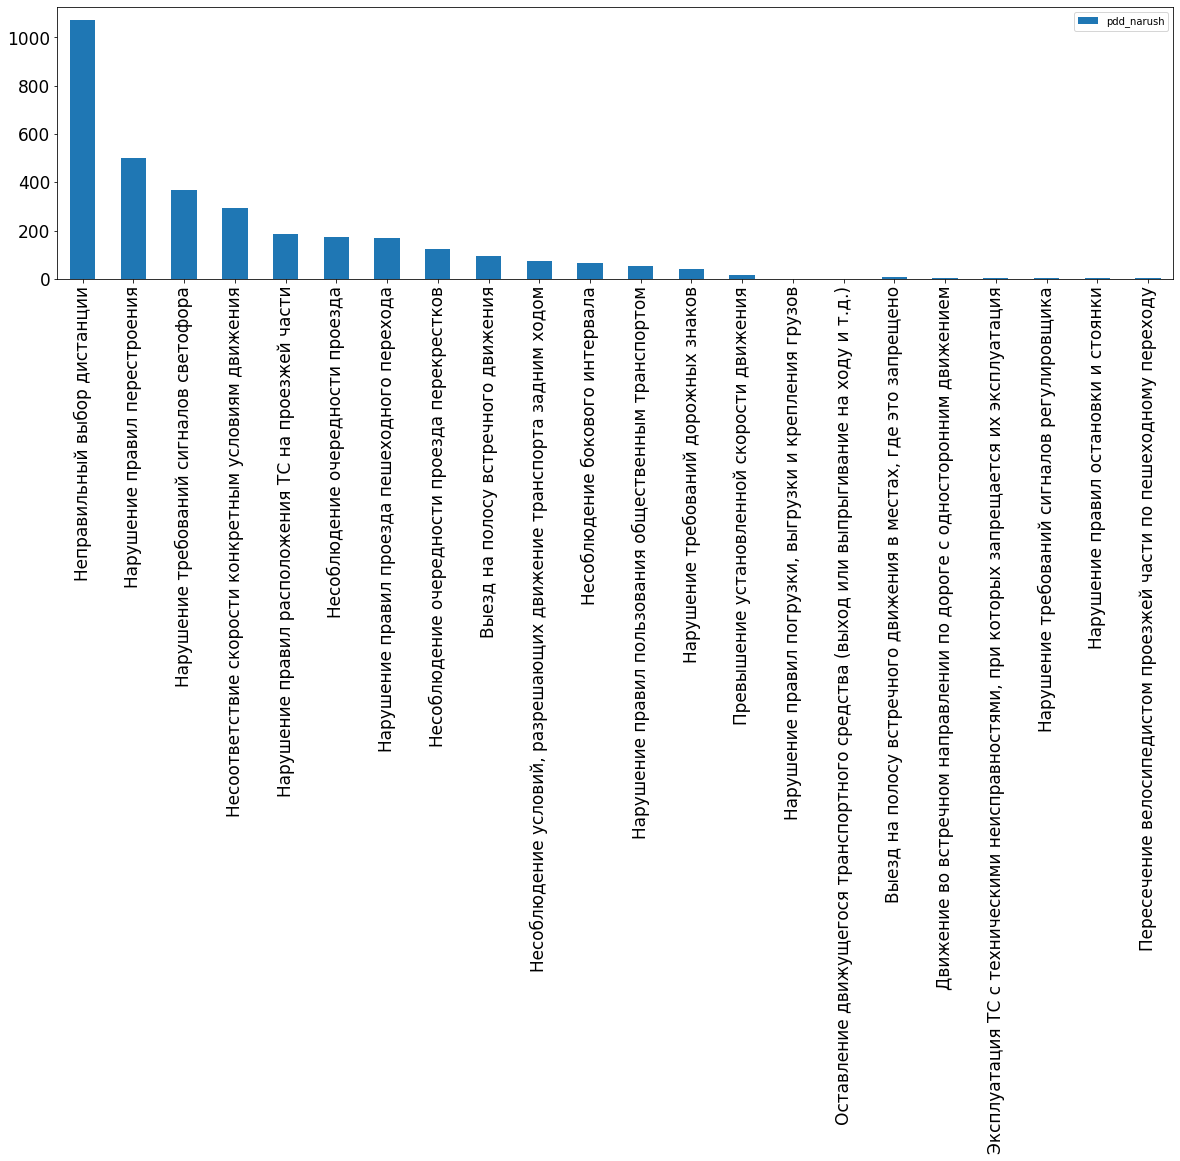

In [137]:
odin.plot(kind='bar',fontsize=17, figsize =(20,5))

# Статистика по нескольким нарушениям ПДД

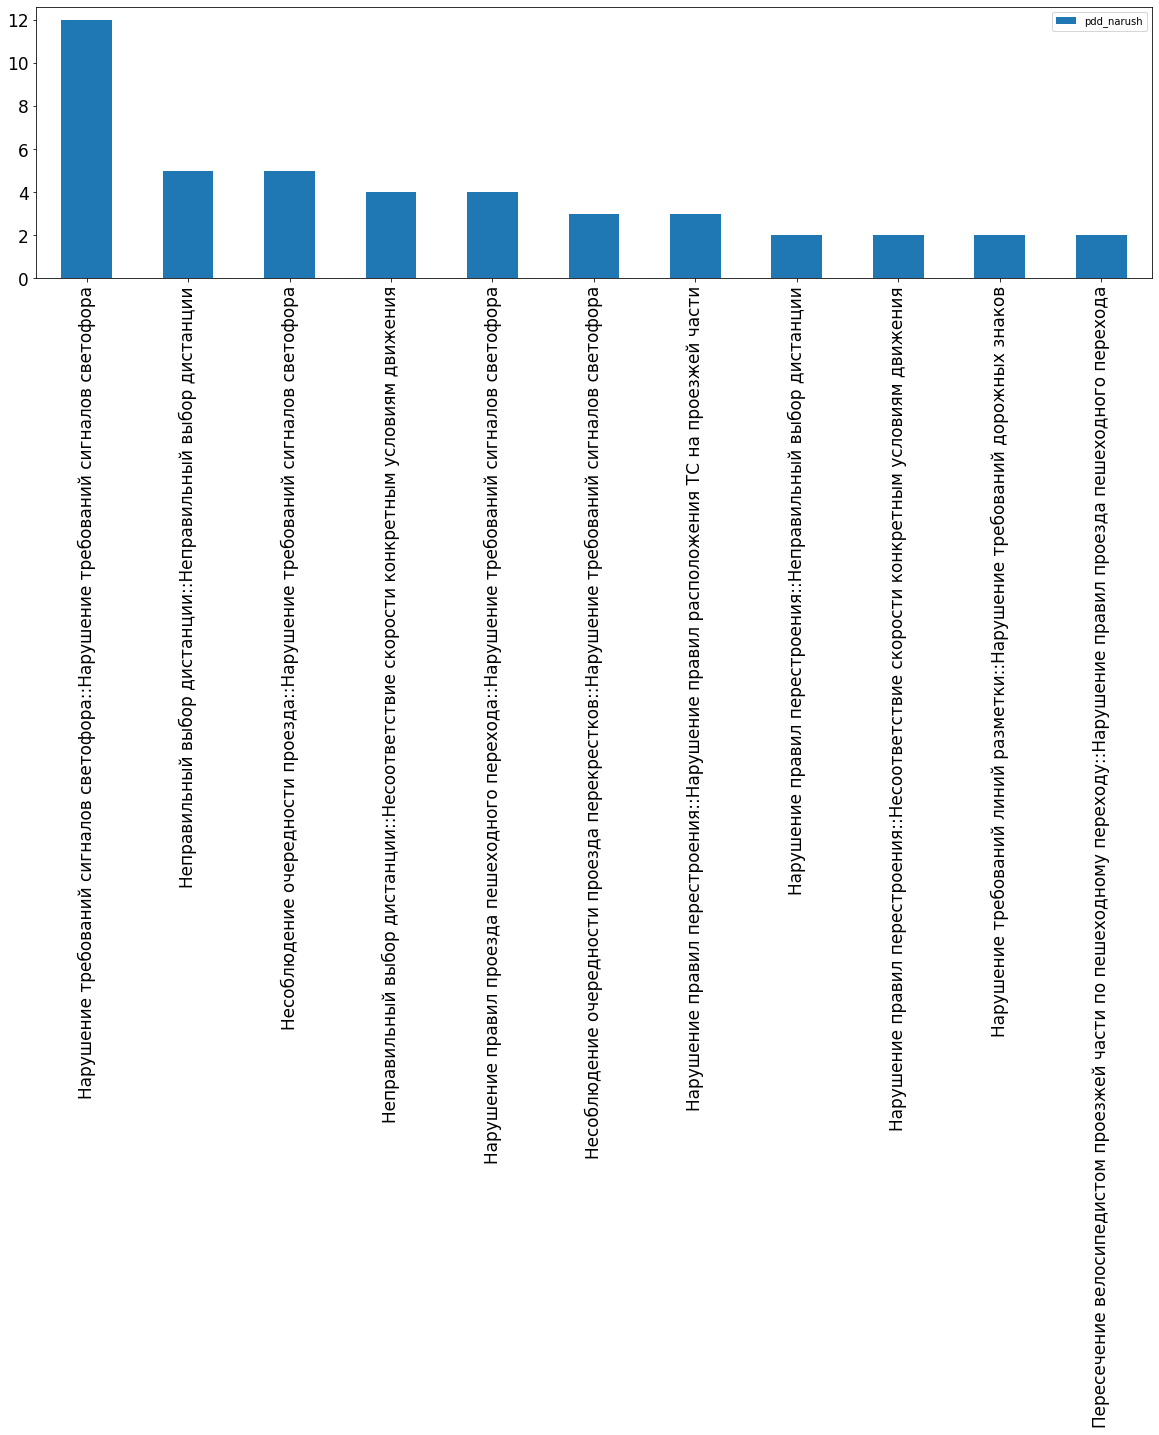

In [141]:
nesk.plot(kind='bar',fontsize=17, figsize =(20,5))

# Неправильный выбор дистанции

### Общее количество ДТП с нарушением дистанции - 1093

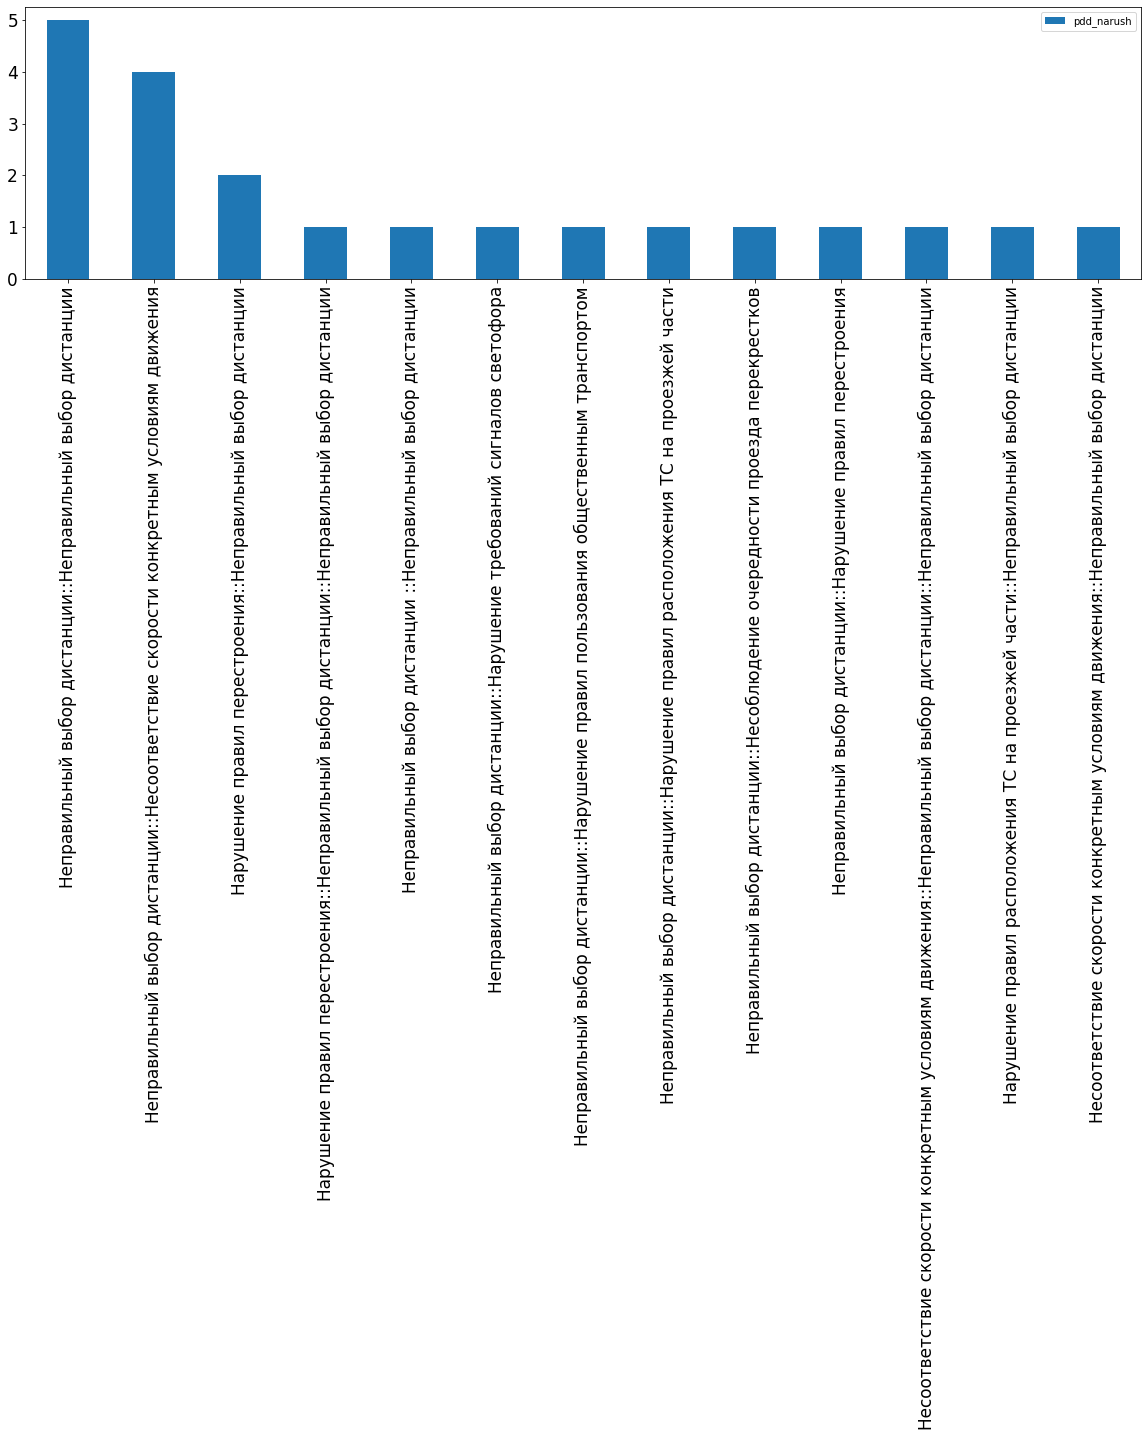

In [153]:
dist.plot(kind='bar',fontsize=17, figsize =(20,5))

### Наиболее часто несоблюдение дистанции встречается с несоответствием скорости конкретным условиям движения и нарушениями правил перестроения.

# Нарушение правил перестроения

### Общее количество ДТП с нарушением правил перестроения - 517

In [160]:
perestroy

,pdd_narush
Нарушение правил перестроения,499
Нарушение правил перестроения::Нарушение правил расположения ТС на проезжей части,3
Нарушение правил перестроения::Неправильный выбор дистанции,2
Нарушение правил перестроения::Несоответствие скорости конкретным условиям движения,2
Нарушение правил перестроения::Нарушение правил перестроения,2
"Нарушение правил перестроения::Непредоставление преимущества в движении ТС, имеющему нанесенные на наружные поверхности специа",1
Нарушение правил перестроения::Неправильный выбор дистанции::Неправильный выбор дистанции,1
Несоблюдение очередности проезда перекрестков::Нарушение правил перестроения,1
Нарушение правил остановки и стоянки::Нарушение правил перестроения,1
Нарушение правил перестроения::Нарушение правил остановки и стоянки,1


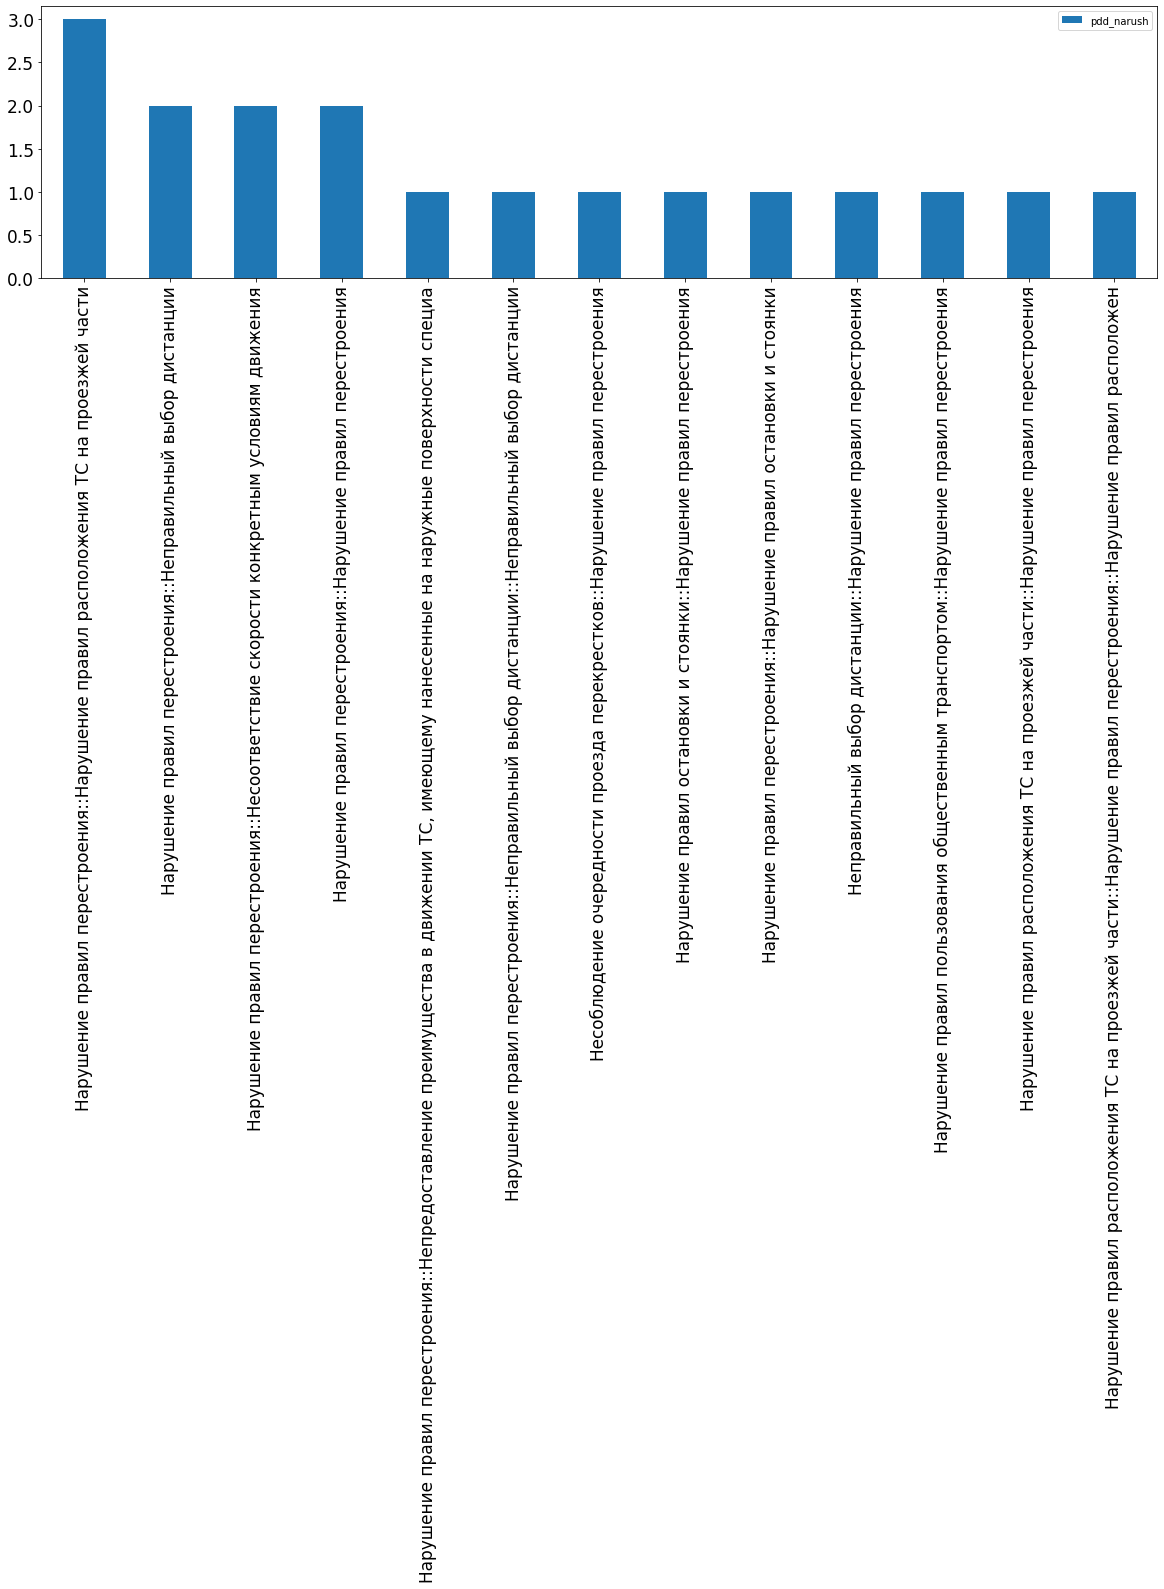

In [162]:
perestroy.plot(kind='bar',fontsize=17, figsize =(20,5))

### Наиболее часто нарушения правил перестроения встречаются с нарушением правил расположения ТС на проезжей части, а также неправильным выбором дистанции и несоответствием скорости.

# Нарушение требований сигнала светофора

### Общее количество ДТП с нарушением требований сигнала светофора - 398

In [166]:
svetophor

,pdd_narush
Нарушение требований сигналов светофора,367
Нарушение требований сигналов светофора::Нарушение требований сигналов светофора,12
Несоблюдение очередности проезда::Нарушение требований сигналов светофора,5
Нарушение правил проезда пешеходного перехода::Нарушение требований сигналов светофора,4
Несоблюдение очередности проезда перекрестков::Нарушение требований сигналов светофора,3
Нарушение требований сигналов светофора::Несоблюдение очередности проезда перекрестков,1
Неправильный выбор дистанции::Нарушение требований сигналов светофора,1
Нарушение требований сигналов светофора::Нарушение правил расположения ТС на проезжей части,1
Несоблюдение очередности проезда::Нарушение требований сигналов светофора::Несоблюдение очередности проезда,1
Нарушение требований сигналов светофора::Нарушение требований дорожных знаков,1


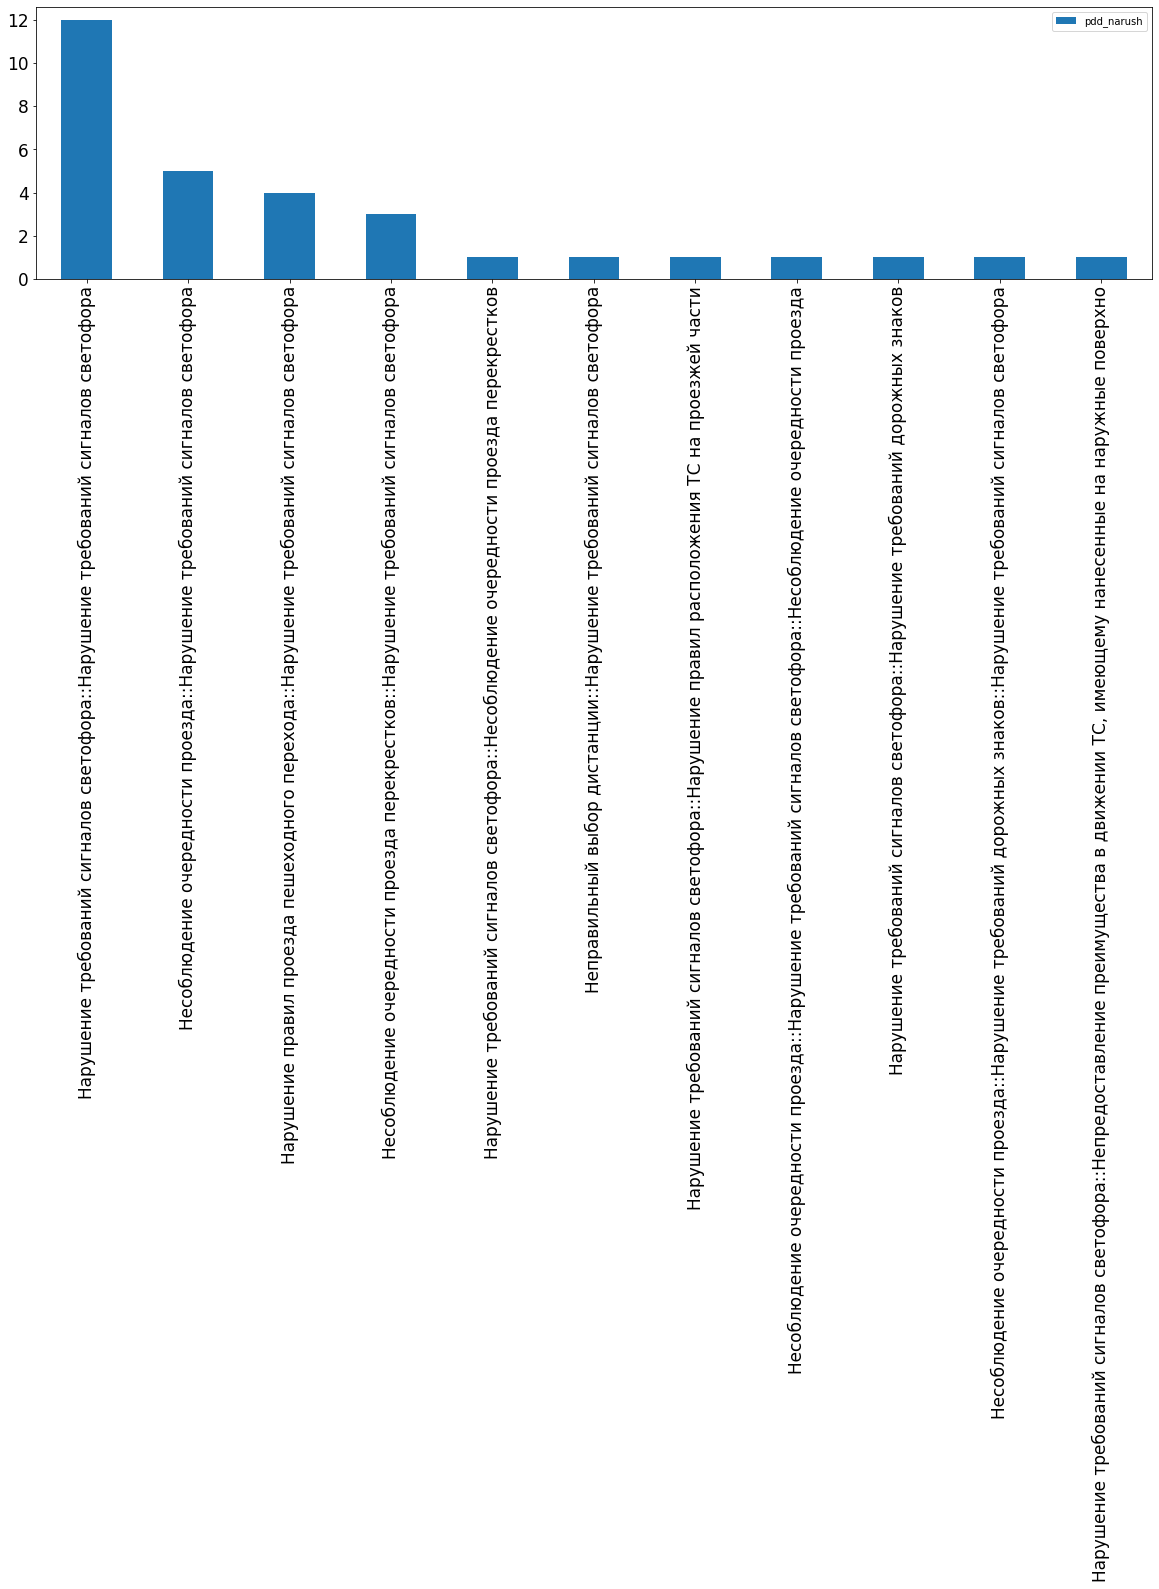

In [168]:
svetophor.plot(kind='bar',fontsize=17, figsize =(20,5))

### Наиболее часто нарушения требований сигнала светофора встречаются с несоблюдением очередности проезда, а также нарушением правил проезда пешеходного перехода и несоблюдением очередности проезда перекрестков.

# Несоответствие скорости конкретным условиям движения

### Общее количество ДТП ввиду несоответствия скорости конкретным условиям движения - 301

In [176]:
skorost

,pdd_narush
Несоответствие скорости конкретным условиям движения,292
Неправильный выбор дистанции::Несоответствие скорости конкретным условиям движения,4
Нарушение правил перестроения::Несоответствие скорости конкретным условиям движения,2
Нарушение правил расположения ТС на проезжей части::Несоответствие скорости конкретным условиям движения,1
Несоответствие скорости конкретным условиям движения::Неправильный выбор дистанции::Неправильный выбор дистанции,1
Несоответствие скорости конкретным условиям движения::Неправильный выбор дистанции,1


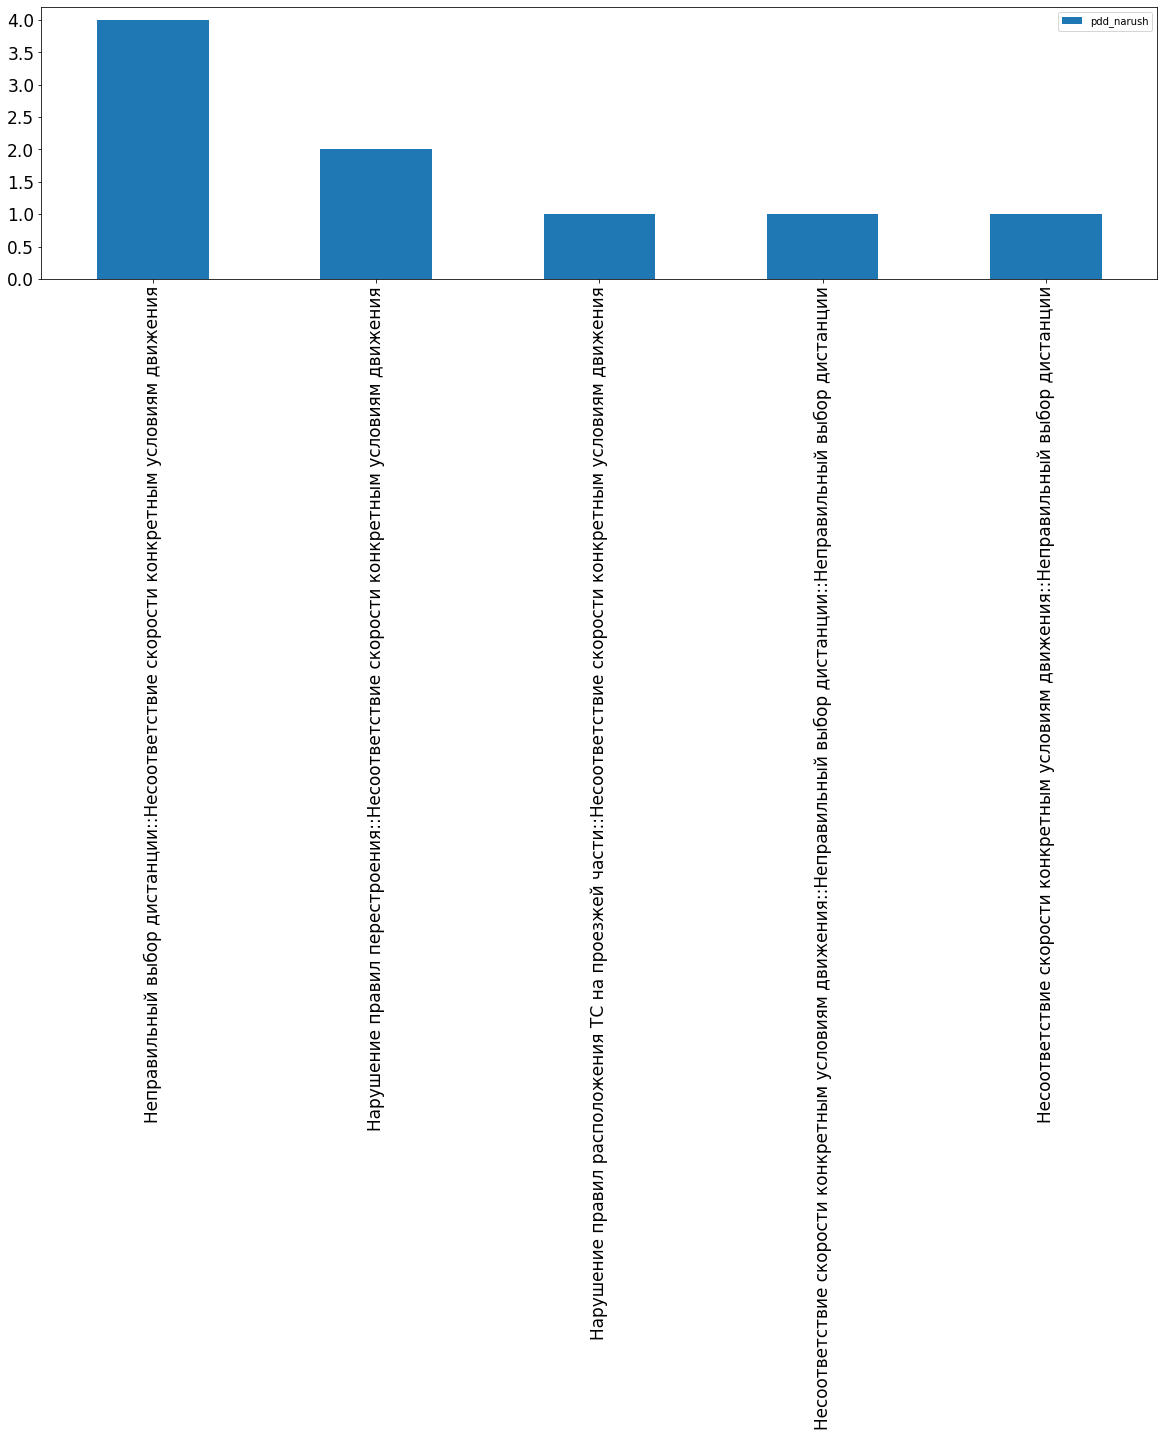

In [179]:
skorost.plot(kind='bar',fontsize=17, figsize =(20,5))

### Несоответствие скорости конкретным условиям движения происходят вместе с неправильным выбором дистанции, нарушениями правил перестроения, нарушениями правил расположения ТС на проезжей части.

# Нарушение правил расположения ТС на проезжей части

### Общее количество ДТП вследствие нарушения правил расположения ТС на проезжей части - 205

In [183]:
raspoloz

,pdd_narush
Нарушение правил расположения ТС на проезжей части,186
Нарушение правил перестроения::Нарушение правил расположения ТС на проезжей части,3
Нарушение правил расположения ТС на проезжей части::Нарушение правил расположения ТС на проезжей части,3
Нарушение правил остановки и стоянки::Нарушение правил расположения ТС на проезжей части,2
"Нарушение правил расположения ТС на проезжей части::Несоблюдение условий, разрешающих движение транспорта задним ходом",2
Неправильный выбор дистанции::Нарушение правил расположения ТС на проезжей части,1
Нарушение требований сигналов светофора::Нарушение правил расположения ТС на проезжей части,1
Несоблюдение бокового интервала::Нарушение правил расположения ТС на проезжей части,1
"Нарушение правил расположения ТС на проезжей части::Разворот в местах, где разворот запрещён",1
Нарушение правил расположения ТС на проезжей части::Нарушение правил перестроения,1


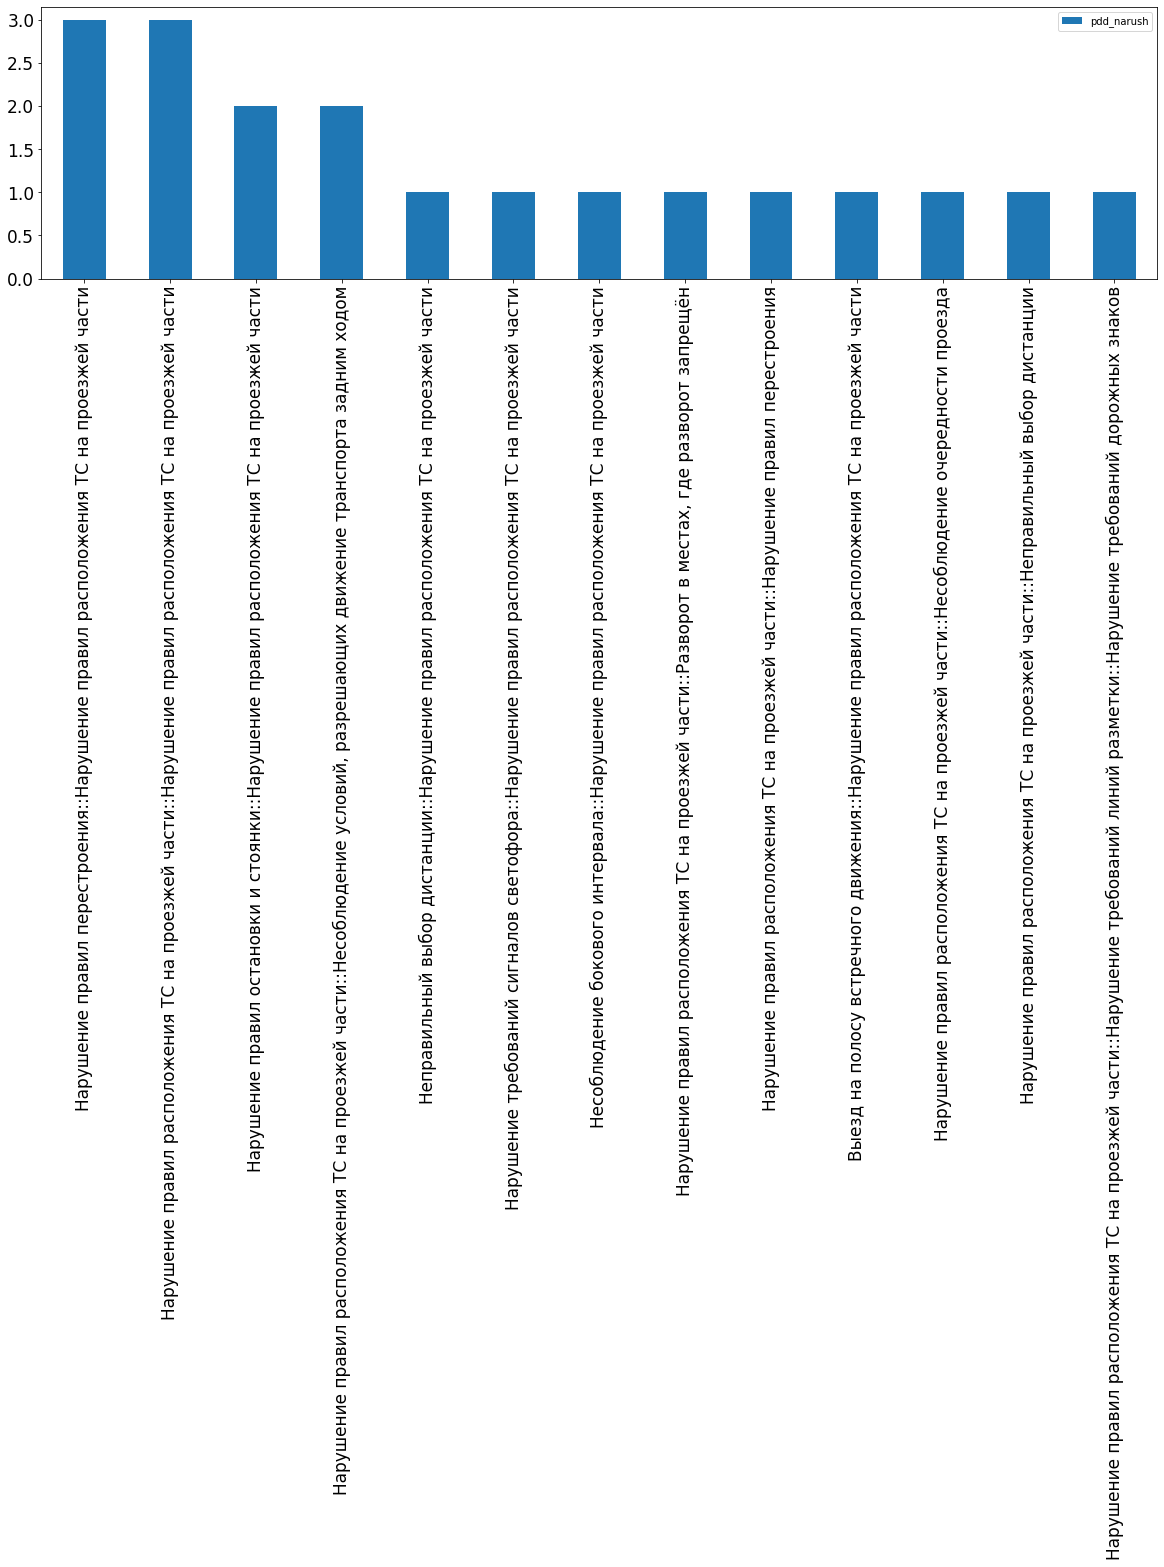

In [186]:
raspoloz.plot(kind='bar',fontsize=17, figsize =(20,5))

### Нарушение правил расположения ТС на проезжей части происходят чаще совместно с нарушениями правил перестроения, нарушениями правил остановки и стоянки, несоблюдением условий, разрешающих движение ТС задним ходом.

# Несоблюдение очередности проезда

### Общее количество ДТП вследствие несоблюдения очередности проезда - 188

In [190]:
ochered

,pdd_narush
Несоблюдение очередности проезда,175
Несоблюдение очередности проезда::Нарушение требований сигналов светофора,5
"Несоблюдение очередности проезда::Непредоставление преимущества в движении ТС, имеющему нанесенные на наружные поверхности спе",1
Несоблюдение очередности проезда::Нарушение требований линий разметки,1
Несоблюдение очередности проезда::Нарушение требований сигналов светофора::Несоблюдение очередности проезда,1
Несоблюдение очередности проезда::Нарушение требований дорожных знаков::Нарушение требований сигналов светофора,1
Пересечение велосипедистом проезжей части по пешеходному переходу::Несоблюдение очередности проезда,1
Нарушение правил расположения ТС на проезжей части::Несоблюдение очередности проезда,1
Нарушение требований дорожных знаков::Несоблюдение очередности проезда,1
"Выезд на полосу встречного движения с разворотом, поворотом налево или объездом препятствия::Несоблюдение очередности проезда",1


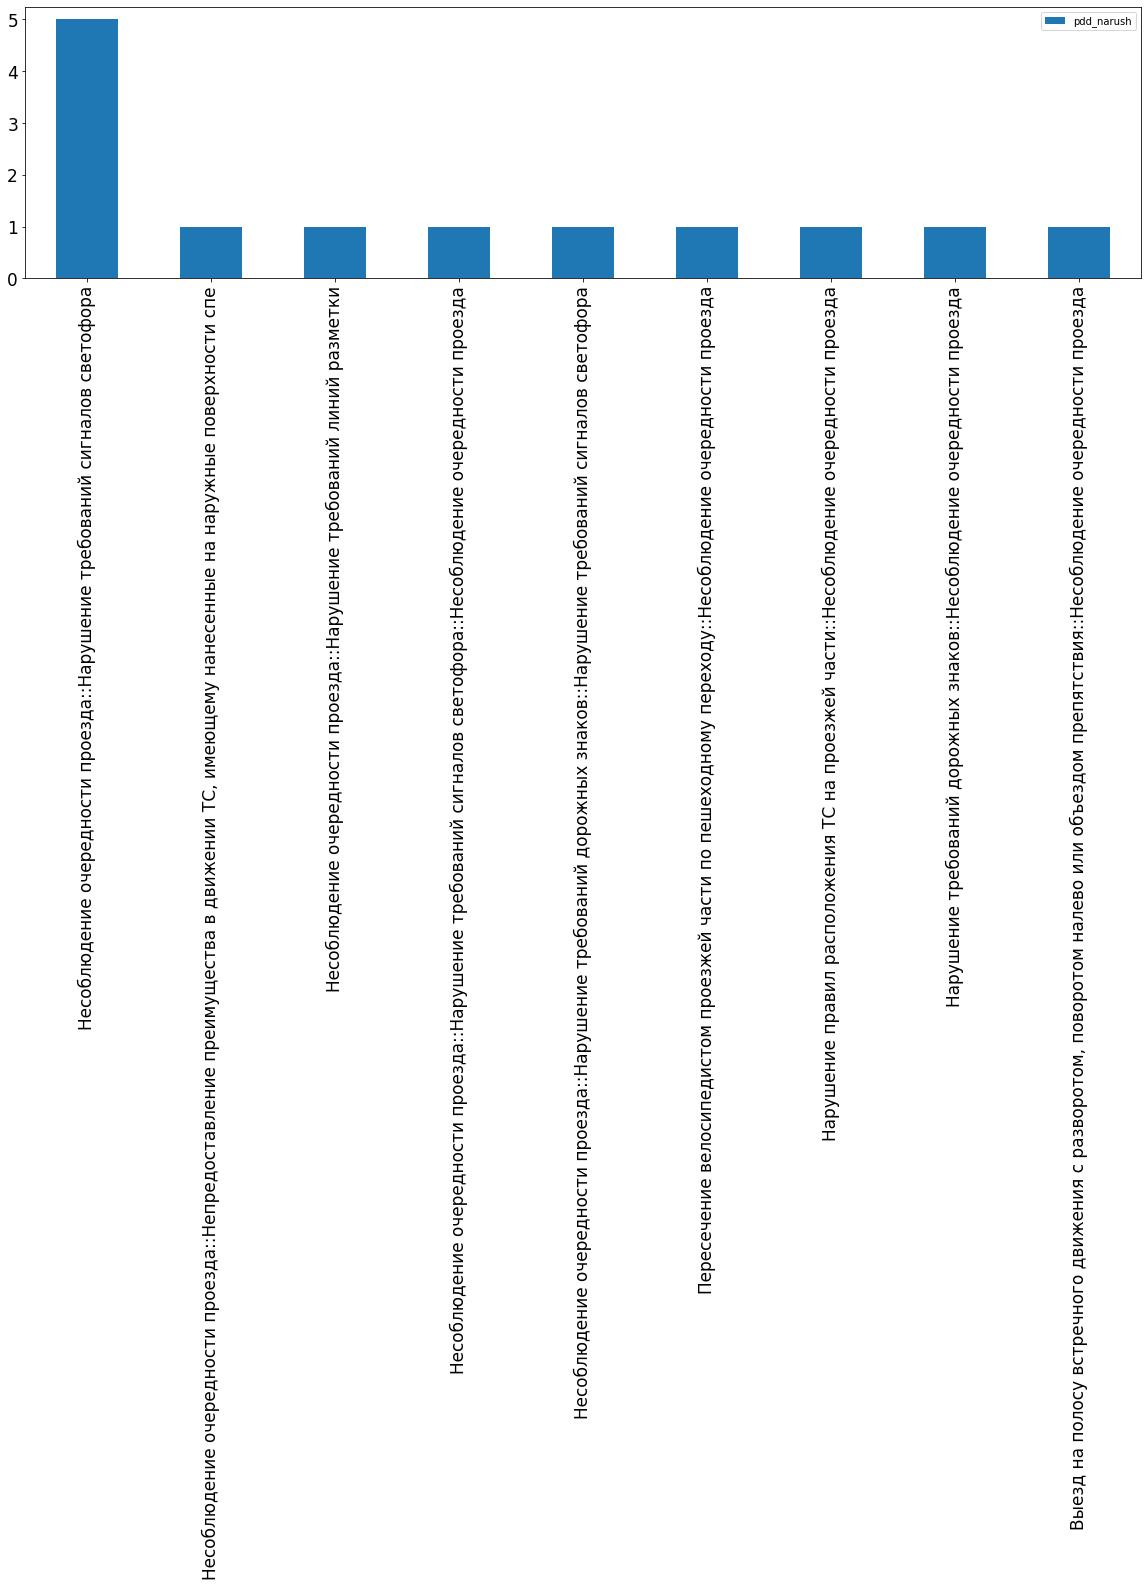

In [192]:
ochered.plot(kind='bar',fontsize=17, figsize =(20,5))

### Несоблюдение очередности проезда происходит вместе с нарушениями требований сигнала светофора, непредоставления преимущества в движении ТС, имеющему нанесенные на наружные поверхности специальных знаков.

# Нарушение правил проезда пешеходного перехода

### Общее количество ДТП с нарушением правил проезда пешеходного перехода - 181

In [196]:
peshehod

,pdd_narush
Нарушение правил проезда пешеходного перехода,169
Нарушение правил проезда пешеходного перехода::Нарушение требований сигналов светофора,4
Нарушение правил проезда пешеходного перехода::Пересечение велосипедистом проезжей части по пешеходному переходу,3
Пересечение велосипедистом проезжей части по пешеходному переходу::Нарушение правил проезда пешеходного перехода,2
"Нарушение правил проезда пешеходного перехода::Несоблюдение условий, разрешающих движение транспорта задним ходом",1
Нарушение правил проезда пешеходного перехода::Нарушение правил проезда пешеходного перехода,1
Нарушение правил проезда пешеходного перехода::Движение во встречном направлении по дороге с односторонним движением,1


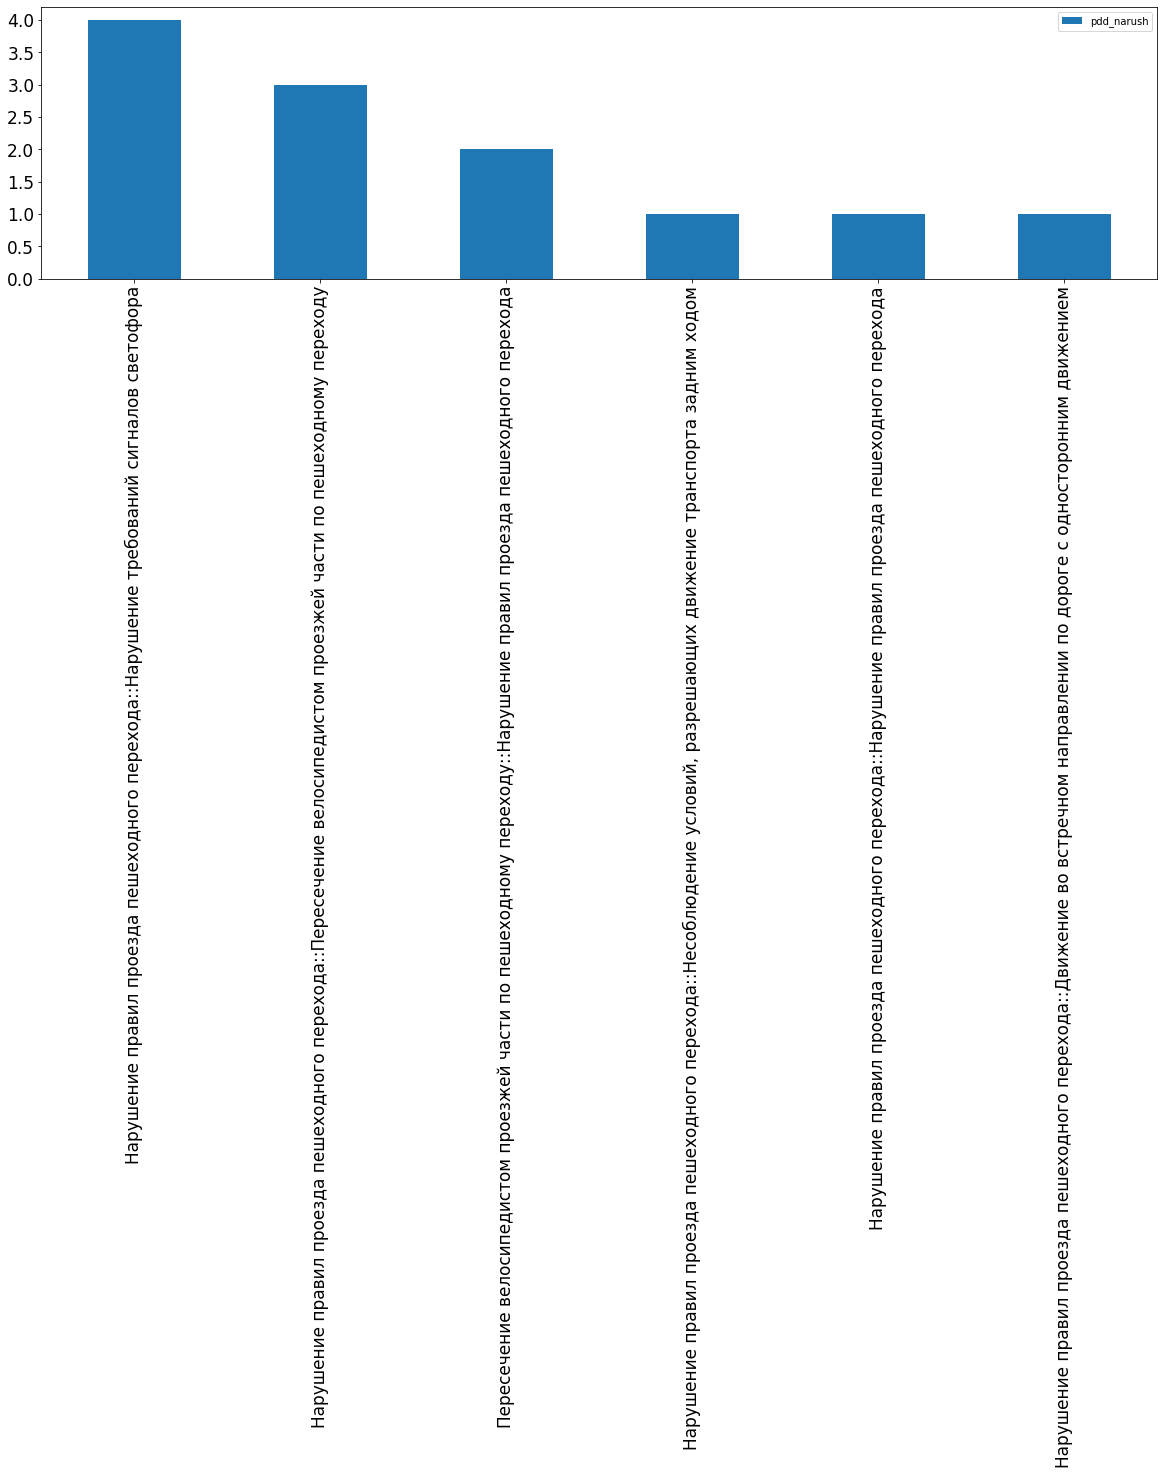

In [198]:
peshehod.plot(kind='bar',fontsize=17, figsize =(20,5))

### Нарушение правил проезда пешеходного перехода сопровождается нарушением требований сигналов светофора, пересечением велосипедистом проезжей части по пешеходному переходу, несоблюдением условий, разрешающих движение транспорта задним ходом.	

# Несоблюдение очередности проезда перекрестков

### Общее количество ДТП ввиду несоблюдения очередности проезда перекрестков - 136

In [202]:
perekrest

,pdd_narush
Несоблюдение очередности проезда перекрестков,124
Несоблюдение очередности проезда перекрестков::Нарушение требований сигналов светофора,3
Несоблюдение очередности проезда перекрестков::Несоблюдение очередности проезда перекрестков,3
Нарушение требований сигналов светофора::Несоблюдение очередности проезда перекрестков,1
Несоблюдение очередности проезда перекрестков::Нарушение правил пользования общественным транспортом::Нарушение правил пользов,1
Нарушение требований дорожных знаков::Несоблюдение очередности проезда перекрестков,1
Несоблюдение очередности проезда перекрестков::Пересечение велосипедистом проезжей части по пешеходному переходу,1
Несоблюдение очередности проезда перекрестков::Нарушение правил перестроения,1
Нарушение требований линий разметки::Несоблюдение очередности проезда перекрестков,1


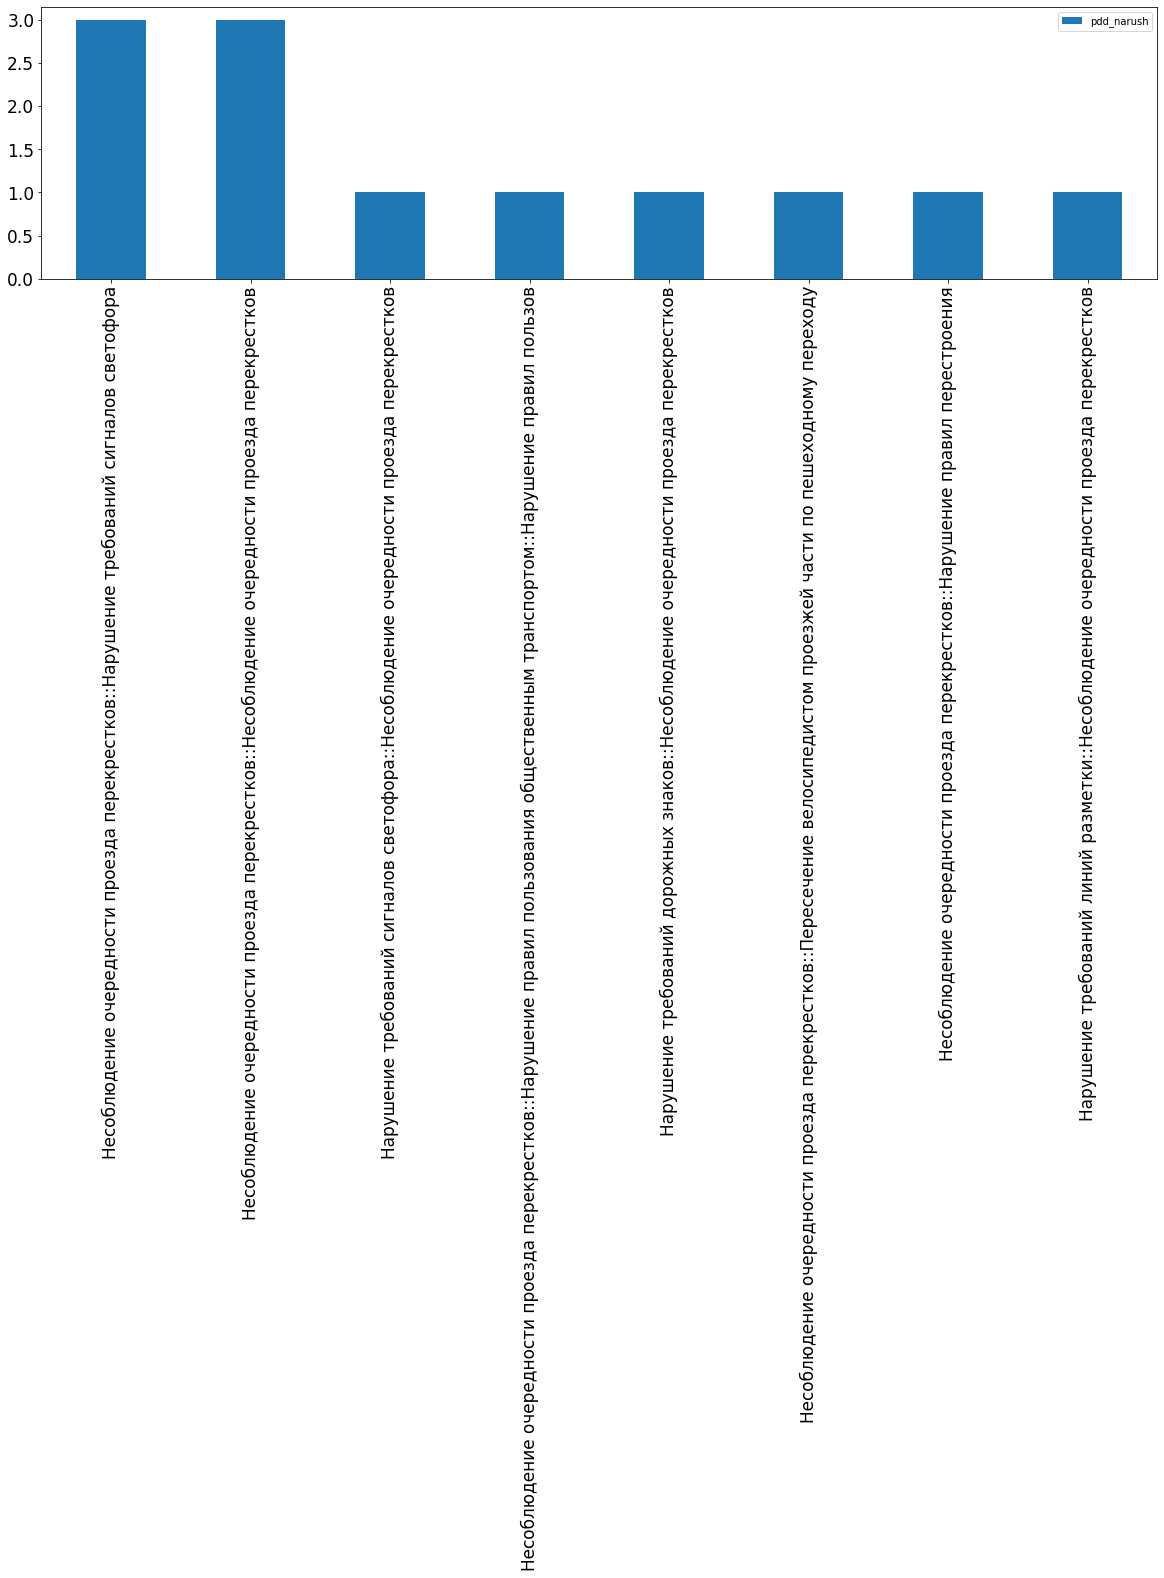

In [204]:
perekrest.plot(kind='bar',fontsize=17, figsize =(20,5))

### Несоблюдение очередности проезда перекрестков сопровождается с нарушениями требований сигналов светофора, нарушениями требований дорожных знаков.

# Выезд на полосу встречного движения

### Дтп, связанных с выездом ТС на полосу встречного движения, общее количество - 112

In [210]:
vstrechka

,pdd_narush
Выезд на полосу встречного движения,95
Выезд на полосу встречного движения::Нарушение правил расположения ТС на проезжей части,1
"Выезд на полосу встречного движения в местах, где это запрещено",7
"Выезд на полосу встречного движения с разворотом, поворотом налево или объездом препятствия",6
"Выезд на полосу встречного движения с разворотом, поворотом налево или объездом препятствия::Нарушение требований линий размет",1
"Выезд на полосу встречного движения в местах, где это запрещено::Выезд на полосу встречного движения с разворотом, поворотом н",1
"Выезд на полосу встречного движения с разворотом, поворотом налево или объездом препятствия::Несоблюдение очередности проезда",1


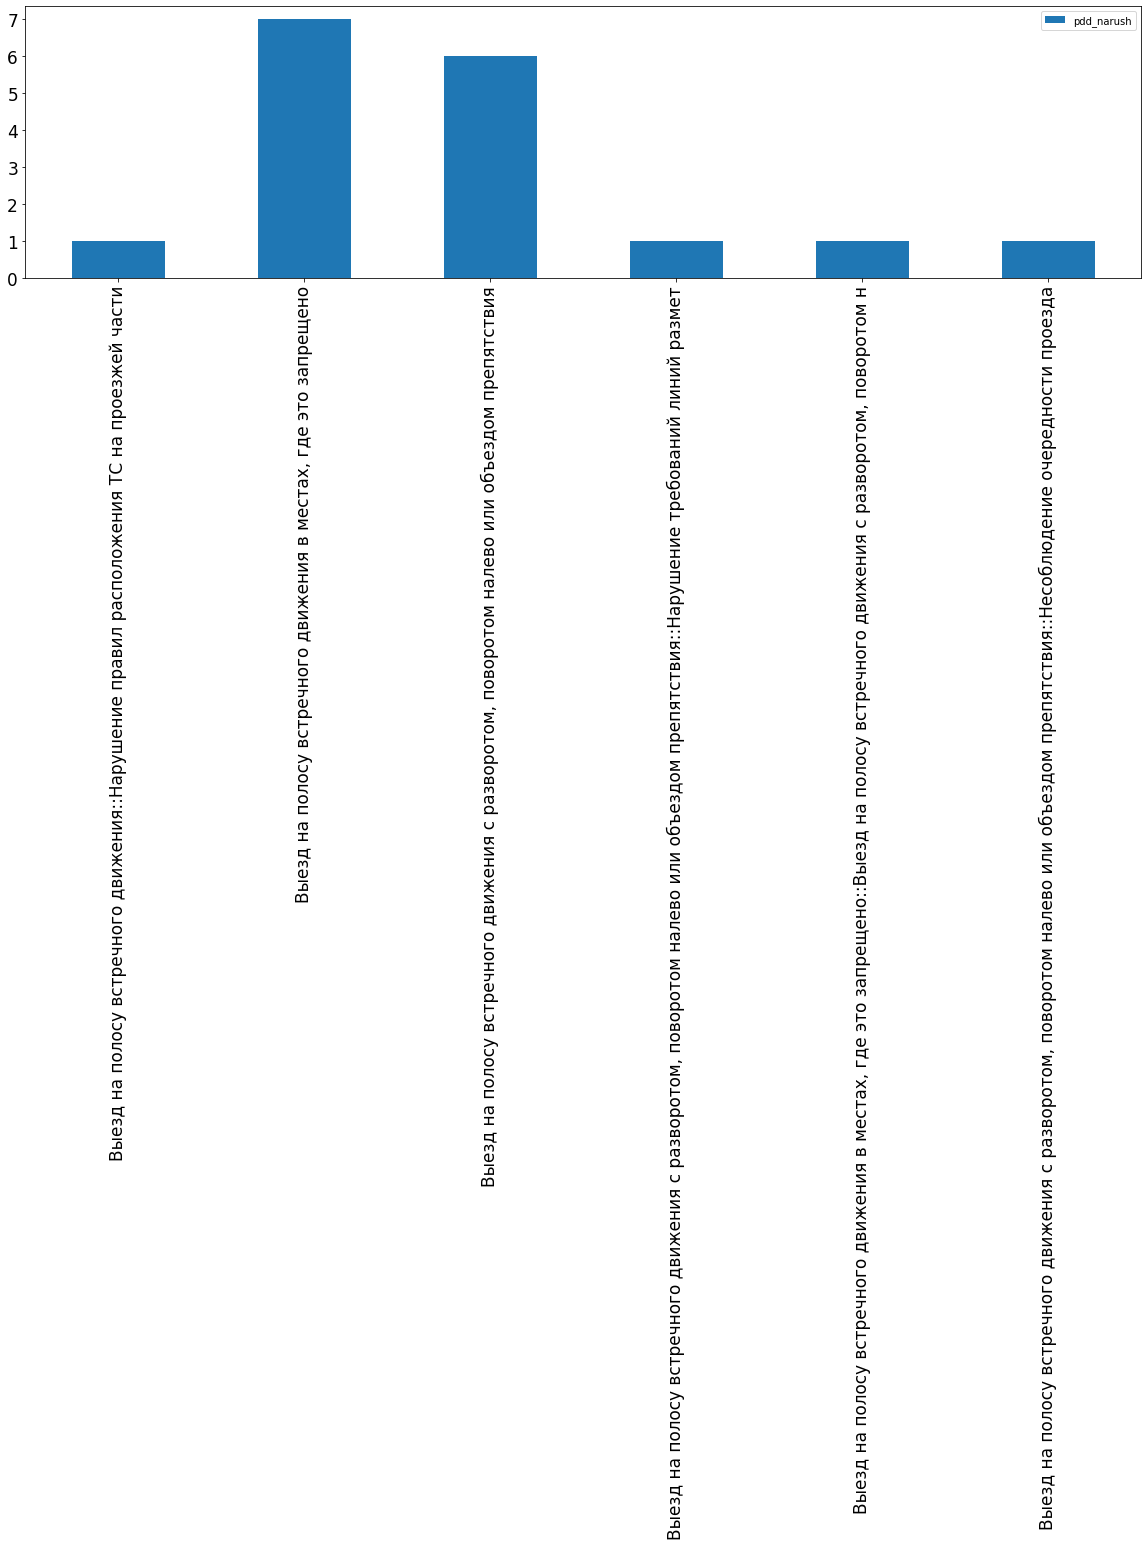

In [213]:
vstrechka.plot(kind='bar',fontsize=17, figsize =(20,5))

### Выезд на полосу встречного движения сопровождается с нарушением правил расположения ТС на проезжей части, нарушением требований линий разметки.

# Несоблюдение условий, разрешающих движение транспорта задним ходом

### Количество ДТП ввиду несоблюдения условий, разрешающих движение транспорта задним ходом - 76

In [217]:
zh

,pdd_narush
"Несоблюдение условий, разрешающих движение транспорта задним ходом",73
"Нарушение правил расположения ТС на проезжей части::Несоблюдение условий, разрешающих движение транспорта задним ходом",2
"Нарушение правил проезда пешеходного перехода::Несоблюдение условий, разрешающих движение транспорта задним ходом",1


### Несоблюдение условий, разрешающих движение транспорта задним ходом сопровождается нарушением правил расположения ТС на проезжей части и нарушением правил проезда пешеходного перехода.

# Несоблюдение бокового интервала

###  Количество ДТП вследствие несоблюдения бокового интервала равно 67

In [222]:
bok

,pdd_narush
Несоблюдение бокового интервала,64
Несоблюдение бокового интервала::Несоблюдение бокового интервала,2
Несоблюдение бокового интервала::Нарушение правил расположения ТС на проезжей части,1


### Несоблюдение бокового интервала сопровождается нарушением правил расположения ТС на проезжей части.

# Нарушение правил пользования общественным транспортом

### Количество ДТП из-за нарушения правил пользования обзественным транспортом - 58

In [226]:
obts

,pdd_narush
Нарушение правил пользования общественным транспортом,54
Несоблюдение очередности проезда перекрестков::Нарушение правил пользования общественным транспортом::Нарушение правил пользов,1
Неправильный выбор дистанции::Нарушение правил пользования общественным транспортом,1
Нарушение правил пользования общественным транспортом::Нарушение правил перестроения,1
Нарушение правил пользования общественным транспортом::Нарушение правил пользования общественным транспортом,1


### Нарушение правил пользования общественным транспортом совершаются вместе с несоблюдением очередности проезда перекрестков, неправильным выбором дистанции и нарушением правил перестроения.

# Нарушение требований дорожных знаков

### Общее количество ДТП с наршениями требований дорожных знаков составляет - 50

In [230]:
znak

,pdd_narush
Нарушение требований дорожных знаков,42
Нарушение требований линий разметки::Нарушение требований дорожных знаков,2
Нарушение требований дорожных знаков::Нарушение требований дорожных знаков,1
Нарушение требований дорожных знаков::Несоблюдение очередности проезда перекрестков,1
Нарушение требований сигналов светофора::Нарушение требований дорожных знаков,1
Несоблюдение очередности проезда::Нарушение требований дорожных знаков::Нарушение требований сигналов светофора,1
Нарушение правил расположения ТС на проезжей части::Нарушение требований линий разметки::Нарушение требований дорожных знаков,1
Нарушение требований дорожных знаков::Несоблюдение очередности проезда,1


### Нарушения требований дорожных знаков чаще всего совершается совместно с нарушением требований линий разметки.